In [1]:
import matplotlib, sys

import numpy as np
np.seterr(all="ignore")
from threeML import *
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

matplotlib.use('Agg')
import matplotlib.pyplot as plt
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import ROOT
from time import *
import traceback
import healpy as hp
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()


from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange
import root_numpy as rn

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.visualization import astropy_mpl_style, imshow_norm
from astropy.coordinates import Angle

import scipy as sp
import ctypes
import copy

from tqdm import tqdm

import MapPalette
import mytools as mt

from scipy.optimize import curve_fit
import importlib; importlib.reload(mt)

Welcome to JupyROOT 6.24/06


20:30:01 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=958457;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=624965;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=202292;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=599277;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=308444;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=21589;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

20:30:02 INFO      Starting 3ML!                                                                     ]8;id=183477;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=34003;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=988334;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=664290;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=540536;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=3287;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=950137;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=626158;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

20:30:03 WARNING   Multinest minimizer not available                                           ]8;id=411354;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=114431;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

20:30:03 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=327122;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=922601;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=482915;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=719813;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=519459;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=45857;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

20:30:04 WARNING   No fermitools installed                                              ]8;id=171660;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=883562;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

20:30:04 WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=65404;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=916344;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=606889;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=630455;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=410772;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=102444;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

HTTPConnectionPool(host='127.0.0.1', port=4780): Max retries exceeded with url: http://tevcat.uchicago.edu/ (Caused by ProxyError('Cannot connect to proxy.', RemoteDisconnected('Remote end closed connection without response')))


<module 'mytools' from '/Users/shenhuafei/1_Sciencehome/Source/J0248NEW!/src/mytools.py'>


WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



20:30:18 INFO      Creating singleton for                                                            ]8;id=630195;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=48660;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#41\41]8;;\
                  /Users/shenhuafei/1_Sciencehome/Source/J0248NEW!/src/../data/WCDA_DR_psf.root                    

20:30:24 INFO      Region of Interest:                                                                   ]8;id=853122;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=911856;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=832912;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=705130;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixConeROI: Center (R.A., Dec) = (42.380, 60.370), data radius =      ]8;id=372255;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py\healpix_cone_roi.py]8;;\:]8;id=259245;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py#87\87]8;;\
                  2.500 deg, model radius: 8.000 deg                                                               

         INFO                                                                                            ]8;id=584846;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=852279;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=51722;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=771061;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=46572;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=795652;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 96 x 96 px                                                            ]8;id=388908;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=636208;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=372987;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=246905;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=143581;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=965479;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=913051;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=784503;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=855844;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=830598;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=740125;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=272313;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /Users/shenhuafei/1_Sciencehome/Source/J0248NEW!/src/../data/WCDA_DR_psf.root                    

         INFO      Number of dec bins: 110                                                          ]8;id=550732;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=362613;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=851092;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=955449;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=996343;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=615000;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=458585;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=367414;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=688155;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=741683;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,965372.068802,964296.106764,1.001116,5990,19.63816
1,1,1024,RING,489604.992802,489123.693926,1.000984,5990,19.63816
2,2,1024,RING,86573.734318,86326.968637,1.002859,5990,19.63816
3,3,1024,RING,36663.935893,36270.399549,1.010850,5990,19.63816
4,4,1024,RING,9293.865310,9092.852318,1.022107,5990,19.63816
5,5,1024,RING,2646.349141,2585.242495,1.023637,5990,19.63816


         INFO      This Map Tree contains 510.000 transits in the first bin                         ]8;id=61699;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=759039;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 0.58 Mb                                                         ]8;id=808949;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=551958;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=812900;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=314635;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=930485;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=40663;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=238506;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=493589;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=511920;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=237423;file:///Users/shenhuafei/opt/anaconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

Error in <TTreeFormula::Compile>:  Bad numerical expression : "name"


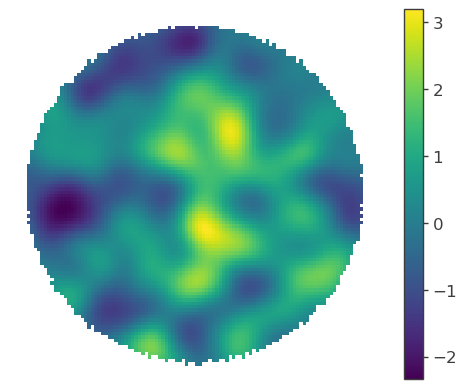

In [2]:
#####   Data Initialize

# maptree = "../data/residual_all.root"
maptree = "../data/J0248.root"
response = "../data/WCDA_DR_psf.root"

ra_J0248, dec_J0248 = 42.38, 60.37
ra_LSI61303,dec_LSI61303=40.14166666666666,61.25694444444444
ra1,dec1=ra_J0248,dec_J0248
ra2,dec2=ra_LSI61303,dec_LSI61303


data_radius = 2.5
model_radius = 8.0
roi=HealpixConeROI(ra=ra_J0248,dec=dec_J0248,data_radius=data_radius,model_radius=model_radius)
WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.17)

#####   Data Situation

%matplotlib inline
WCDA.set_active_measurements(0, 5)
WCDA.display()

fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
fig.show()
fig.savefig("../res/sy.png",dpi=300)

In [18]:
bin="0"

nside=2**10
npix=hp.nside2npix(nside)
pixid=roi.active_pixels(1024)

data = WCDA._maptree._analysis_bins[bin].observation_map.as_partial()
bkg = WCDA._maptree._analysis_bins[bin].background_map.as_partial()
skymapon = np.full(npix, hp.UNSEEN)
skymapoff = np.full(npix, hp.UNSEEN)

for i,idx in enumerate(pixid):
    skymapon[idx] = data[i]
    skymapoff[idx] = bkg[i]

skyexcess = skymapon-skymapoff
skymapon = hp.ma(skymapon)
skymapoff = hp.ma(skymapoff)
skyexcess = hp.ma(skyexcess)

40.14166666666666 61.25694444444444 LS I +61 303
40.75 60.45 J0243+6027
42.07758333333333 60.35963888888889 J0248+6021


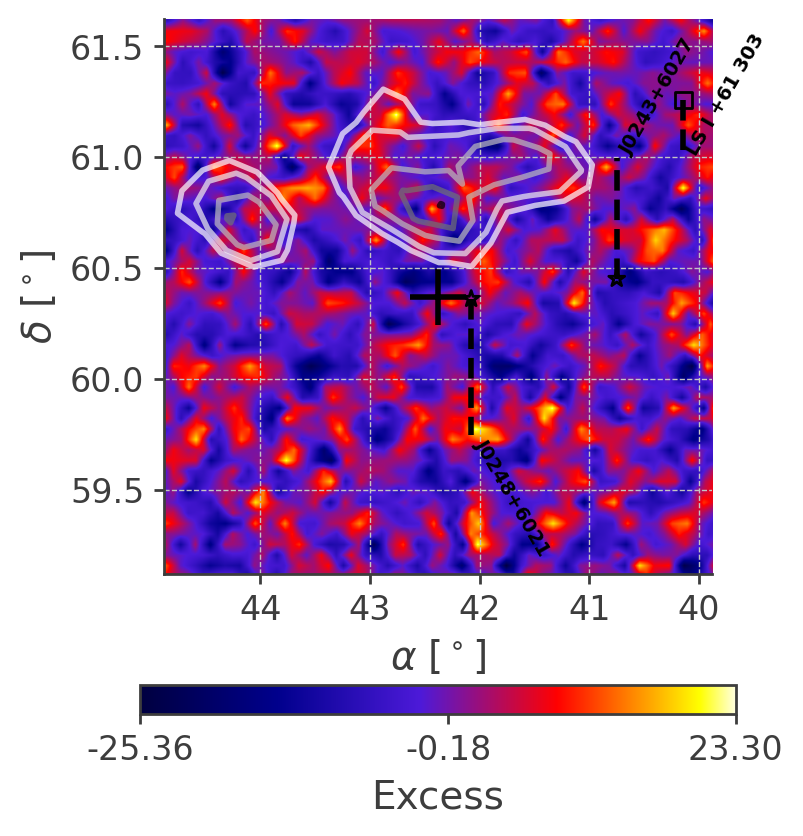

In [30]:
%matplotlib inline
mt.hpDraw(skyexcess,
          ra=ra1,
          dec=dec1,
          contours=[]
          )